# **KNN** #

**Classification**

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

**Loading Dataset**

In [3]:
df = pd.read_csv("../Datasets/BankNote_Authentication.csv")

df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Checking for Duplicates and Missing Values**

In [4]:
print(df.isnull().sum().sum())

0


In [5]:
print(df.duplicated().sum())

24


In [6]:
df = df.drop_duplicates()

The Dataset is clean and fairly simple already.

**Train/Test Split**

In [7]:
#Defining the dataset into X & Y 

X = df.drop(["class"], axis=1)
y = df[["class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


**Determine the optimal k-value**

Based on iterations, best k-value is this:
1


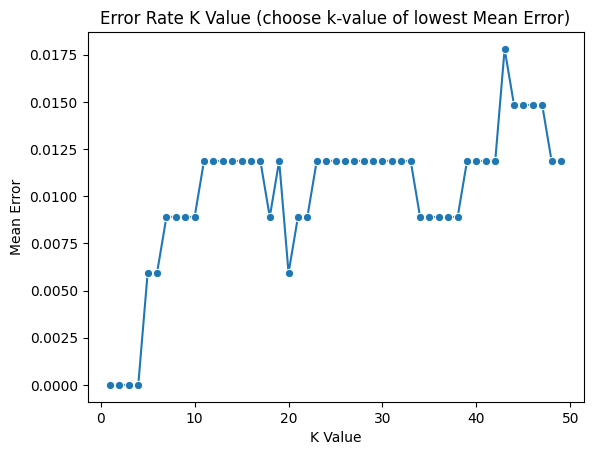

In [ ]:
y_train = y_train.values.ravel()  # converting to 1D array if its a dataFrame
y_test = y_test.values.ravel()

# this is a KNN-specific part, we have to search for the optimal
# k-value in our data
# NOTE: this part is a bit different depending on whether doing regression or classification

###################################

# CLASSIFIER VERSION
# adjust this to 50 or even 150 if you have lots of data rows
max_iterations = 50

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "minkowski"

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

**KNN Model**

In [13]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric=metric_selection))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

**Metrics**

In [14]:
#making test predictions 
predictions = model.predict(X_test)

# printing the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# getting overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       152

    accuracy                           1.00       337
   macro avg       1.00      1.00      1.00       337
weighted avg       1.00      1.00      1.00       337


Model overall accuracy: 100.00%


The metrics show that the model is working perfectly.

[[185   0]
 [  0 152]]


<Axes: >

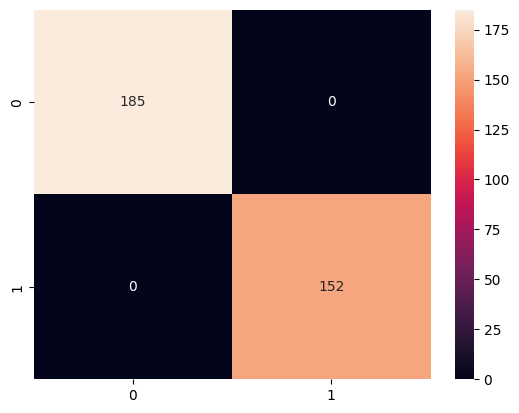

In [15]:
print(confusion_matrix(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [16]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


1.0

ROC AUC score of 1.0 shows that its performing perfectly.

In [38]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [18]:
# Gender -column: 0 => Female, 1 => Male
tester_row = {
    'variance': 0.40614,
    'skewness': 1.3492,
    'curtosis': -1.4501,
    'entropy': -0.55949
}

# creating a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])

print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Is this Bank Note Fake (No/Yes):")
result = labels[model.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0. 1.]]

Is this Bank Note Fake (No/Yes):
Yes
-------------------


**Summary**

We have imported all the libraries first then we imported the data and checked for duplicates and misssing values and dropped missing values. We found optimal K-value and trained the model and checked metrics which are perfect and ROC AUC for the model showed 1.0 which is very good.


